In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot: >

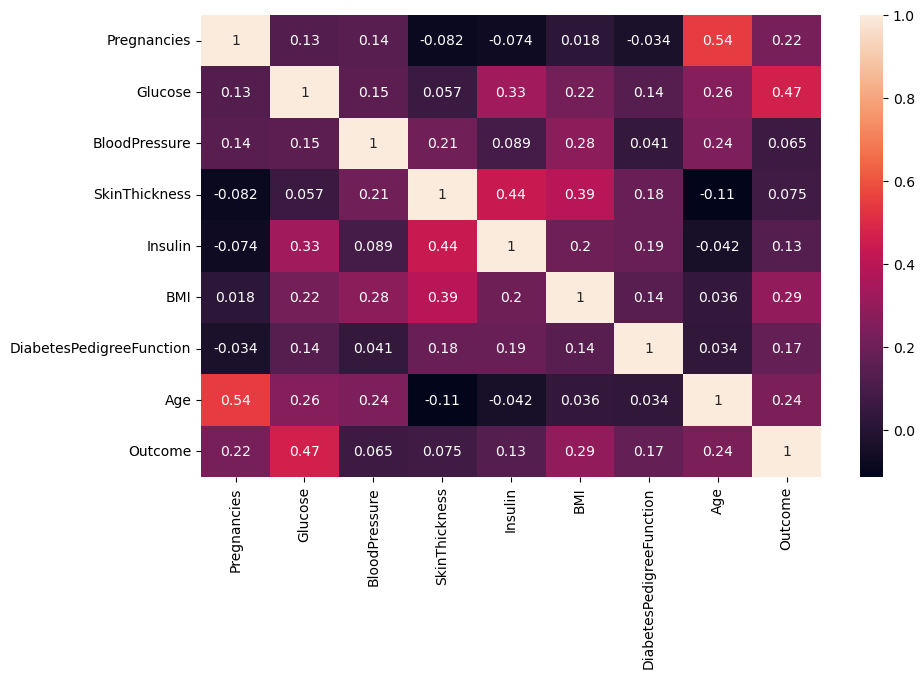

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [6]:
# sns.pairplot(df)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  5,  3,  4, 10,  0,  7,  9, 11, 13,  2, 12])

In [11]:
#Independent and dependent features
X=df.iloc[:,:-1]
y=df['Outcome']

In [12]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [15]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
429,1,95,82,25,180,35.0,0.233,43
155,7,152,88,44,0,50.0,0.337,36
389,3,100,68,23,81,31.6,0.949,28
367,0,101,64,17,0,21.0,0.252,21
39,4,111,72,47,207,37.1,1.390,56


[Text(0.37109375, 0.9642857142857143, 'x[1] <= 114.5\nentropy = 0.892\nsamples = 460\nvalue = [318, 142]'),
 Text(0.15833333333333333, 0.8928571428571429, 'x[7] <= 31.5\nentropy = 0.548\nsamples = 229\nvalue = [200, 29]'),
 Text(0.08333333333333333, 0.8214285714285714, 'x[3] <= 23.5\nentropy = 0.321\nsamples = 154\nvalue = [145, 9]'),
 Text(0.03333333333333333, 0.75, 'x[6] <= 0.672\nentropy = 0.096\nsamples = 81\nvalue = [80, 1]'),
 Text(0.016666666666666666, 0.6785714285714286, 'entropy = 0.0\nsamples = 72\nvalue = [72, 0]'),
 Text(0.05, 0.6785714285714286, 'x[5] <= 24.05\nentropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(0.03333333333333333, 0.6071428571428571, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06666666666666667, 0.6071428571428571, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.13333333333333333, 0.75, 'x[0] <= 6.5\nentropy = 0.499\nsamples = 73\nvalue = [65, 8]'),
 Text(0.11666666666666667, 0.6785714285714286, 'x[5] <= 30.9\nentropy = 0.46\nsamples 

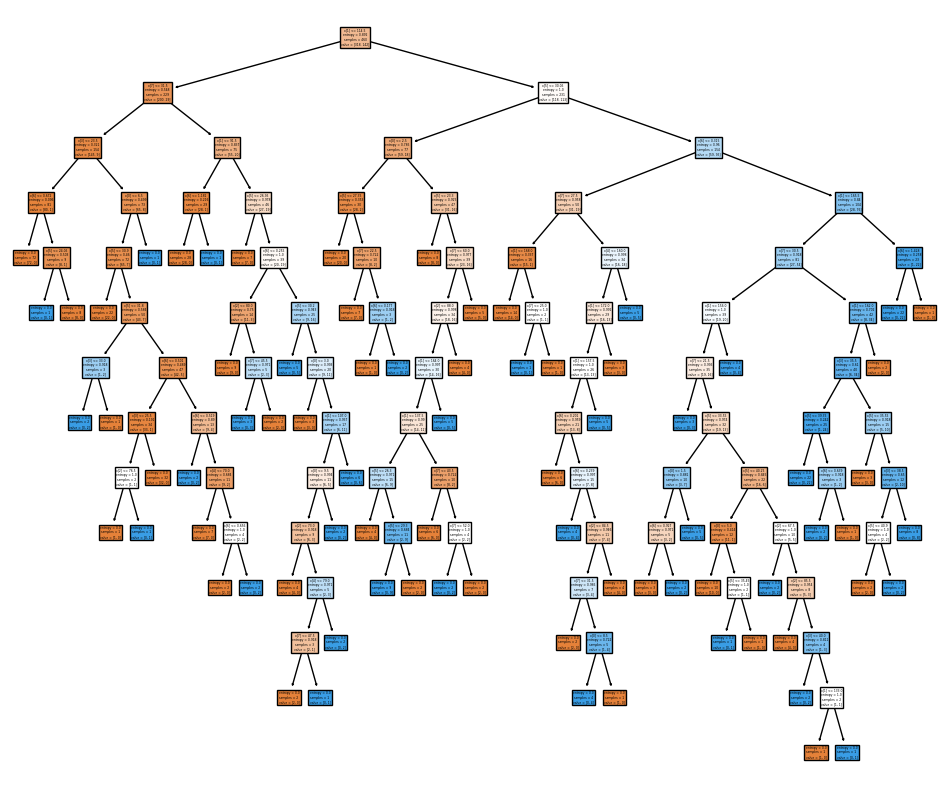

In [17]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [18]:
## Post Prunning
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[1] <= 114.5\nentropy = 0.892\nsamples = 460\nvalue = [318, 142]'),
 Text(0.25, 0.5, 'x[7] <= 31.5\nentropy = 0.548\nsamples = 229\nvalue = [200, 29]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.321\nsamples = 154\nvalue = [145, 9]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.837\nsamples = 75\nvalue = [55, 20]'),
 Text(0.75, 0.5, 'x[5] <= 30.05\nentropy = 1.0\nsamples = 231\nvalue = [118, 113]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.785\nsamples = 77\nvalue = [59, 18]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.96\nsamples = 154\nvalue = [59, 95]')]

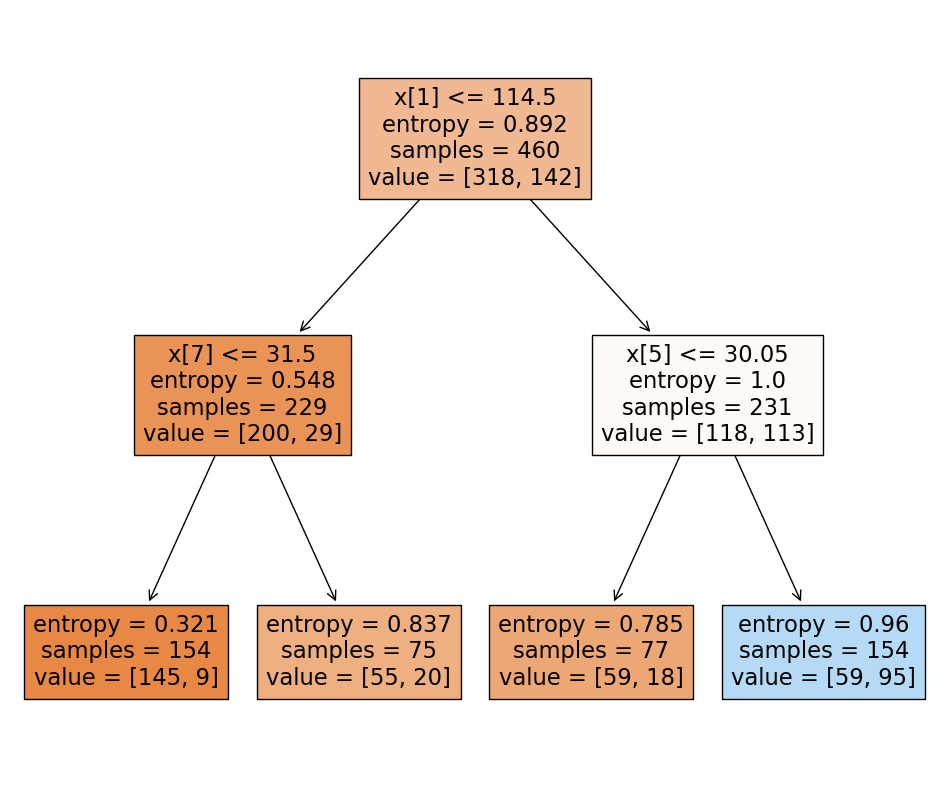

In [19]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [20]:
y_pred=classifier.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1])

In [22]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.6842105263157895
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       143
           1       0.58      0.58      0.58        85

    accuracy                           0.68       228
   macro avg       0.66      0.66      0.66       228
weighted avg       0.68      0.68      0.68       228



In [24]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [25]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [26]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [27]:
y_pred=clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))


0.6535087719298246
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       138
           1       0.56      0.53      0.55        90

    accuracy                           0.65       228
   macro avg       0.64      0.63      0.63       228
weighted avg       0.65      0.65      0.65       228

